<a href="https://colab.research.google.com/github/Noma9d/Python_Data_Science/blob/main/HW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

Вивести перші рядки таблиці за допомогою методу head

In [9]:
import pandas as pd
%matplotlib inline

tables = pd.read_html('https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8', match = "Коефіцієнт народжуваності в регіонах України")
print(tables[0].head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [11]:
data_frame = pd.DataFrame(tables[0])
print(data_frame.shape)

(28, 9)


Замініть у таблиці значення "—" на значення NaN

In [12]:
import numpy as np

nan_data_frame = data_frame.replace('—', np.nan)

print(nan_data_frame)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [12]:
type_cols = nan_data_frame.dtypes
print(type_cols)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [19]:
for column in data_frame.columns:
  if data_frame[column].dtype == object and '—' in data_frame[column].values:
    data_frame[column] = pd.to_numeric(data_frame[column], errors='coerce')

print(data_frame.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [20]:
isnull_data_frame = data_frame.isnull().mean()

print(isnull_data_frame)

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [21]:
drop_last_rows_data_frame = data_frame.drop(data_frame.index[-1])
print(drop_last_rows_data_frame)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [35]:
fillna_data_frame = data_frame.fillna(data_frame.mean())
print(fillna_data_frame)

               Регіон        1950        1960        1970  1990  2000  2012  \
0                Крим  230.000000  206.000000  160.000000   130    73   126   
1           Вінницька  224.000000  192.000000  142.000000   124    84   112   
2           Волинська  247.000000  250.000000  179.000000   153   112   148   
3    Дніпропетровська  204.000000  204.000000  151.000000   123    71   112   
4            Донецька  271.000000  214.000000  140.000000   109    61    98   
5         Житомирська  261.000000  223.000000  159.000000   129    89   122   
6        Закарпатська  314.000000  273.000000  207.000000   168   115   151   
7          Запорізька  219.000000  197.000000  150.000000   124    71   106   
8   Івано-Франківська  243.000000  248.000000  182.000000   155   103   124   
9            Київська  204.000000  189.000000  156.000000   123    73   122   
10     Кіровоградська  216.000000  171.000000  145.000000   126    79   110   
11          Луганська  262.000000  235.000000  144.0

<ipython-input-35-782d34f224e8>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fillna_data_frame = data_frame.fillna(data_frame.mean())


Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [41]:
avarage_data = data_frame['2019'].mean()
per_avarage_data = data_frame[data_frame['2019'] > avarage_data]['Регіон'].tolist()
print(per_avarage_data)

['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ', 'Україна']


У якому регіоні була найвища народжуваність у 2014 році?

In [42]:
max_data_2014 = data_frame['2014'].max()
max_region_2014 = data_frame[data_frame['2014'] == max_data_2014]['Регіон'].iloc[0]
print(max_region_2014)

Рівненська


Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

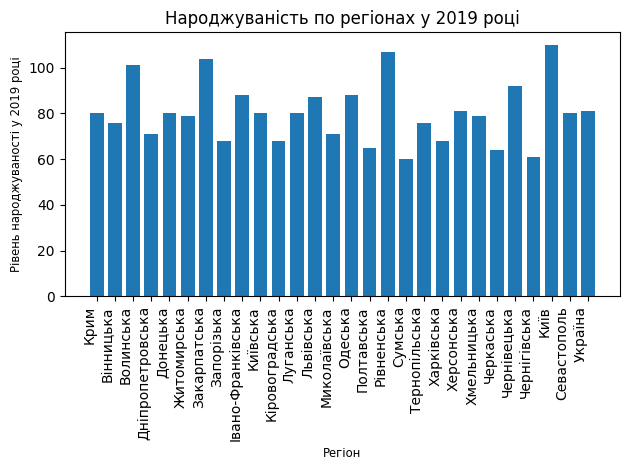

In [56]:
import matplotlib.pyplot as plt

plt.bar(fillna_data_frame['Регіон'], fillna_data_frame['2019'], width = 0.75)
plt.xlabel('Регіон', fontsize="small")
plt.ylabel('Рівень народжуваності у 2019 році', fontsize="small")
plt.title('Народжуваність по регіонах у 2019 році')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Fertility chart 1960')

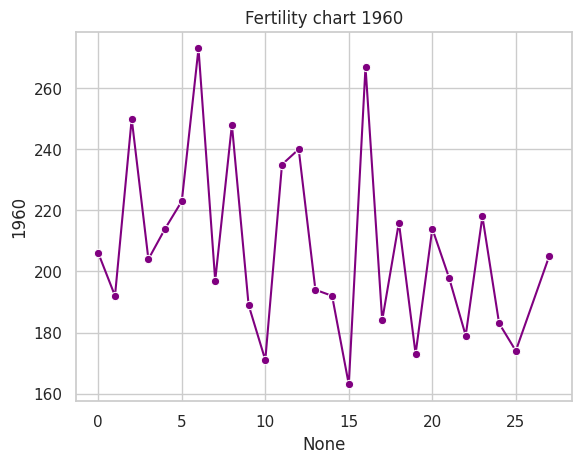

In [22]:
import seaborn as sns

sns.lineplot(x=data_frame.index, y='1960', data=data_frame, marker='o', color='purple')
plt.title('Fertility chart 1960')

<Axes: xlabel='Регіон', ylabel='2000'>

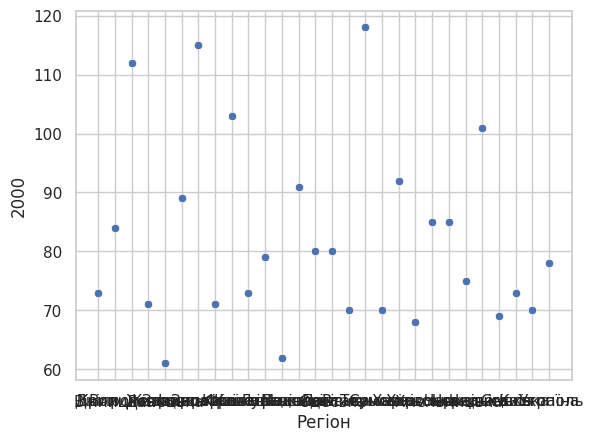

In [29]:
sns.scatterplot(x='Регіон', y='2000', data=data_frame)